Import all required libraries

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import datetime


here i am reading data to my_cars variables

In [24]:
my_cars = pd.read_csv("/content/Untitled Folder/train_data/train.csv")

It gives stats of the data

In [25]:
print(my_cars.describe())


        Unnamed: 0         Year  Kilometers_Driven        Seats        Price
count  5847.000000  5847.000000       5.847000e+03  5809.000000  5847.000000
mean   3013.181461  2013.448435       5.841013e+04     5.286452     9.653742
std    1736.398890     3.194949       9.237971e+04     0.806668    11.275966
min       1.000000  1998.000000       1.710000e+02     2.000000     0.440000
25%    1509.500000  2012.000000       3.346750e+04     5.000000     3.550000
50%    3015.000000  2014.000000       5.257600e+04     5.000000     5.750000
75%    4517.500000  2016.000000       7.249050e+04     5.000000    10.250000
max    6018.000000  2019.000000       6.500000e+06    10.000000   160.000000


Here we are using info to get the datatypes of the each columns in the data

In [26]:
my_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5847 non-null   int64  
 1   Name               5847 non-null   object 
 2   Location           5847 non-null   object 
 3   Year               5847 non-null   int64  
 4   Kilometers_Driven  5847 non-null   int64  
 5   Fuel_Type          5847 non-null   object 
 6   Transmission       5847 non-null   object 
 7   Owner_Type         5847 non-null   object 
 8   Mileage            5845 non-null   object 
 9   Engine             5811 non-null   object 
 10  Power              5811 non-null   object 
 11  Seats              5809 non-null   float64
 12  New_Price          815 non-null    object 
 13  Price              5847 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 639.6+ KB


In [27]:
my_cars.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


In [28]:
my_cars.isnull()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5843,False,False,False,False,False,False,False,False,False,False,False,False,True,False
5844,False,False,False,False,False,False,False,False,False,False,False,False,True,False
5845,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [29]:
my_cars.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5032
Price                   0
dtype: int64

In [66]:
print(my_cars.corr())

                        Unnamed: 0      Year  Kilometers_Driven       Mileage  \
Unnamed: 0                1.000000 -0.001308          -0.008297  1.822039e-02   
Year                     -0.001308  1.000000          -0.169514  3.004365e-01   
Kilometers_Driven        -0.008297 -0.169514           1.000000 -6.202801e-02   
Mileage                   0.018220  0.300436          -0.062028  1.000000e+00   
Engine                         NaN       NaN                NaN           NaN   
Power                    -0.019801  0.003694           0.012890 -4.322972e-01   
Seats                    -0.013963  0.007741           0.083275 -3.240604e-01   
New_Price                -0.025630  0.111752          -0.028449 -6.740380e-02   
Price                    -0.021810  0.299947          -0.008592 -3.316865e-01   
Fuel_Type_Diesel         -0.016265  0.116288           0.106332  1.228305e-01   
Fuel_Type_Electric        0.017705  0.000299          -0.002285 -1.155470e-18   
Fuel_Type_Petrol          0.

<ipython-input-66-bec0496ac522>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(my_cars.corr())


Removing the units from some of the attributes and only keep the numerical values

In [67]:
my_cars['Mileage'] = my_cars['Mileage'].astype(str)
my_cars['Engine'] = my_cars['Engine'].astype(str)
my_cars['Power'] = my_cars['Power'].astype(str)
my_cars['New_Price'] = my_cars['New_Price'].astype(str)

In [68]:
my_cars['Mileage'] = my_cars['Mileage'].str.extract('(\d+\.\d+)', expand=False).astype(float)
my_cars['Engine'] = my_cars['Engine'].str.extract('(\d+\.\d+)', expand=False).astype(float)
my_cars['Power'] = my_cars['Power'].str.extract('(\d+\.\d+)', expand=False).astype(float)
my_cars['New_Price'] = my_cars['New_Price'].str.extract('(\d+\.\d+)', expand=False).astype(float)

In [69]:
def convert_function(text):
    if pd.notna(text):
        matches = re.findall(r'(\d+\.\d+|\d+)', str(text))
        if matches:
            return float(matches[0])
    return None

In [70]:
my_cars["Mileage"] = my_cars["Mileage"].apply(convert_function)
my_cars["Engine"] = my_cars["Engine"].apply(convert_function)
my_cars["Power"] = my_cars["Power"].apply(convert_function)
my_cars["New_Price"] = my_cars["New_Price"].apply(convert_function)

In [71]:
my_cars.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Current_Time
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.670000,0.0,126.20,5.0,11.47,12.50,1,0,0,0,1,8
1,2,Honda Jazz V,Chennai,2011,46000,First,18.159379,0.0,88.70,5.0,8.61,4.50,0,0,1,0,1,12
2,3,Maruti Ertiga VDI,Chennai,2012,87000,First,20.770000,0.0,88.76,7.0,11.47,6.00,1,0,0,0,1,11
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,15.200000,0.0,140.80,5.0,11.47,17.74,1,0,0,1,0,10
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,First,23.080000,0.0,63.10,5.0,11.47,3.50,1,0,0,0,1,10


Engine and newPrice columns emoty values fill it up with median

In [72]:
my_cars['New_Price'].fillna(my_cars['New_Price'].median(), inplace=True)

Replace missing values of Engine Columns

In [74]:
my_cars['Engine'] = my_cars['Engine'].fillna(0)
car_data = my_cars.dropna(subset=['Engine'])

fill up columns which have null values with mean

In [75]:
my_cars['Mileage'].fillna(my_cars['Mileage'].mean(), inplace=True)
my_cars['Seats'].fillna(my_cars['Seats'].mean(), inplace=True)
my_cars['Power'].fillna(my_cars['Power'].mean(), inplace=True)

Now we can all null values are replaced with mean

In [76]:
my_cars.isnull().sum()

Unnamed: 0                0
Name                      0
Location                  0
Year                      0
Kilometers_Driven         0
Owner_Type                0
Mileage                   0
Engine                    0
Power                     0
Seats                     0
New_Price                 0
Price                     0
Fuel_Type_Diesel          0
Fuel_Type_Electric        0
Fuel_Type_Petrol          0
Transmission_Automatic    0
Transmission_Manual       0
Current_Time              0
dtype: int64

<Axes: >

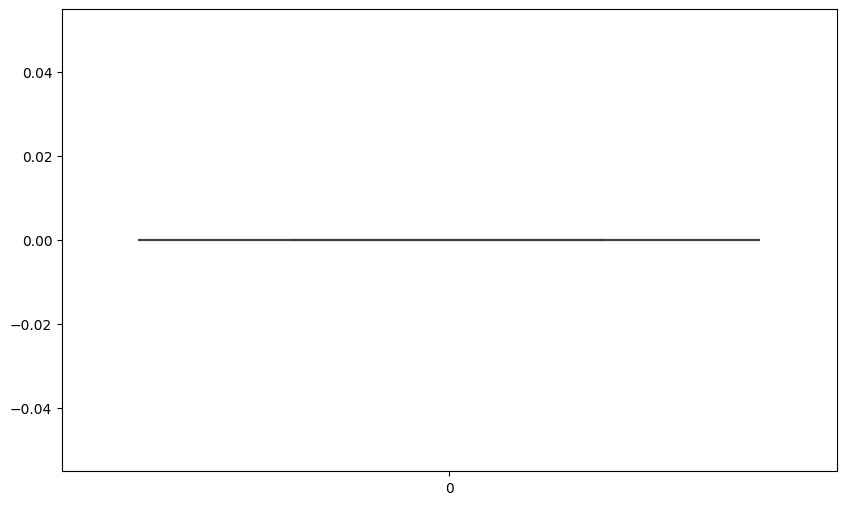

In [90]:
#It shows no null values.
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(my_cars.Engine)

In [77]:
my_cars.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Current_Time
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.670000,0.0,126.20,5.0,11.47,12.50,1,0,0,0,1,8
1,2,Honda Jazz V,Chennai,2011,46000,First,18.159379,0.0,88.70,5.0,8.61,4.50,0,0,1,0,1,12
2,3,Maruti Ertiga VDI,Chennai,2012,87000,First,20.770000,0.0,88.76,7.0,11.47,6.00,1,0,0,0,1,11
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,15.200000,0.0,140.80,5.0,11.47,17.74,1,0,0,1,0,10
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,First,23.080000,0.0,63.10,5.0,11.47,3.50,1,0,0,0,1,10


Changing the categorical variables (“Fuel_Type” and “Transmission”) into numerical one hot
encoded value

In [80]:
if 'Fuel_Type' in my_cars.columns and 'Transmission' in my_cars.columns:
    # Access the columns if they exist
    fuel_type_column = my_cars['Fuel_Type']
    transmission_column = my_cars['Transmission']
else:
    print("The specified columns do not exist in the DataFrame.")

The specified columns do not exist in the DataFrame.


In [81]:
my_cars.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Current_Time
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.670000,0.0,126.20,5.0,11.47,12.50,1,0,0,0,1,8
1,2,Honda Jazz V,Chennai,2011,46000,First,18.159379,0.0,88.70,5.0,8.61,4.50,0,0,1,0,1,12
2,3,Maruti Ertiga VDI,Chennai,2012,87000,First,20.770000,0.0,88.76,7.0,11.47,6.00,1,0,0,0,1,11
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,15.200000,0.0,140.80,5.0,11.47,17.74,1,0,0,1,0,10
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,First,23.080000,0.0,63.10,5.0,11.47,3.50,1,0,0,0,1,10


Creating one more feature and add this column to the dataset


In [82]:
current_year = datetime.datetime.now().year

In [83]:
my_cars.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Current_Time
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.670000,0.0,126.20,5.0,11.47,12.50,1,0,0,0,1,8
1,2,Honda Jazz V,Chennai,2011,46000,First,18.159379,0.0,88.70,5.0,8.61,4.50,0,0,1,0,1,12
2,3,Maruti Ertiga VDI,Chennai,2012,87000,First,20.770000,0.0,88.76,7.0,11.47,6.00,1,0,0,0,1,11
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,15.200000,0.0,140.80,5.0,11.47,17.74,1,0,0,1,0,10
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,First,23.080000,0.0,63.10,5.0,11.47,3.50,1,0,0,0,1,10


In [84]:
my_cars['Current_Time'] = current_year - my_cars['Year']
my_cars.to_csv("final-car-data.csv", index=False)